In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('earloobe_&_arm_data.csv')
data.head(10)a

,Sex,Age,Earlob,Arm
0,male,59,94,109.8
1,male,55,277,302.4
2,male,39,97,106.2
3,male,65,119,127.8
4,male,54,96,100.8
5,female,50,120,127.8
6,male,43,83,81.0
7,male,63,81,97.2
8,male,63,78,93.6
9,male,52,115,118.8


In [3]:
#convert the sex from categorical data to numerical data by using lambda 
data['Sex']= data['Sex'].apply(lambda x: 1 if x == 'male' else (0 if x =="female" else np.nan))
data.head(10)

,Sex,Age,Earlob,Arm
0,1,59,94,109.8
1,1,55,277,302.4
2,1,39,97,106.2
3,1,65,119,127.8
4,1,54,96,100.8
5,0,50,120,127.8
6,1,43,83,81.0
7,1,63,81,97.2
8,1,63,78,93.6
9,1,52,115,118.8


In [4]:
#split data
X=data.drop(['Arm'],axis=1).values

y=data['Arm'].values
print("X= \n",X)
print("_____________________________________________")
print("y=\n",y)

X= 
 [[  1  59  94]
 [  1  55 277]
 [  1  39  97]
 [  1  65 119]
 [  1  54  96]
 [  0  50 120]
 [  1  43  83]
 [  1  63  81]
 [  1  63  78]
 [  1  52 115]
 [  0  62  99]
 [  0  48 140]
 [  0  63 116]
 [  1  41  80]
 [  0  43 107]
 [  0  77 171]
 [  1  49 108]
 [  1  25  93]
 [  0  43 140]
 [  0  48 256]
 [  0  72  98]
 [  0  21  86]
 [  0  58 131]
 [  0  65 110]
 [  0  34 171]
 [  0  45 229]
 [  0  52 154]
 [  0  72 104]
 [  0  50 380]
 [  0  59 277]
 [  0  45  93]
 [  0  34  92]
 [  0  64  78]
 [  0  25 154]
 [  0  25  86]
 [  1  22  93]
 [  1  63 228]
 [  1  58 105]
 [  1  35  77]
 [  1  43 187]
 [  1  56  88]
 [  1  22 117]
 [  1  53  92]
 [  1  43  89]
 [  1  51  87]
 [  1  71 267]
 [  1  48 127]
 [  1  64  98]
 [  0  42  80]]
_____________________________________________
y=
 [109.8 302.4 106.2 127.8 100.8 127.8  81.   97.2  93.6 118.8  99.  149.4
 120.6  81.  109.8 169.2 104.4  88.2 138.6 261.  111.6  77.4 144.  124.2
 180.  239.4 156.6 108.  378.  273.6  91.8  88.2  77.4 165.6  7

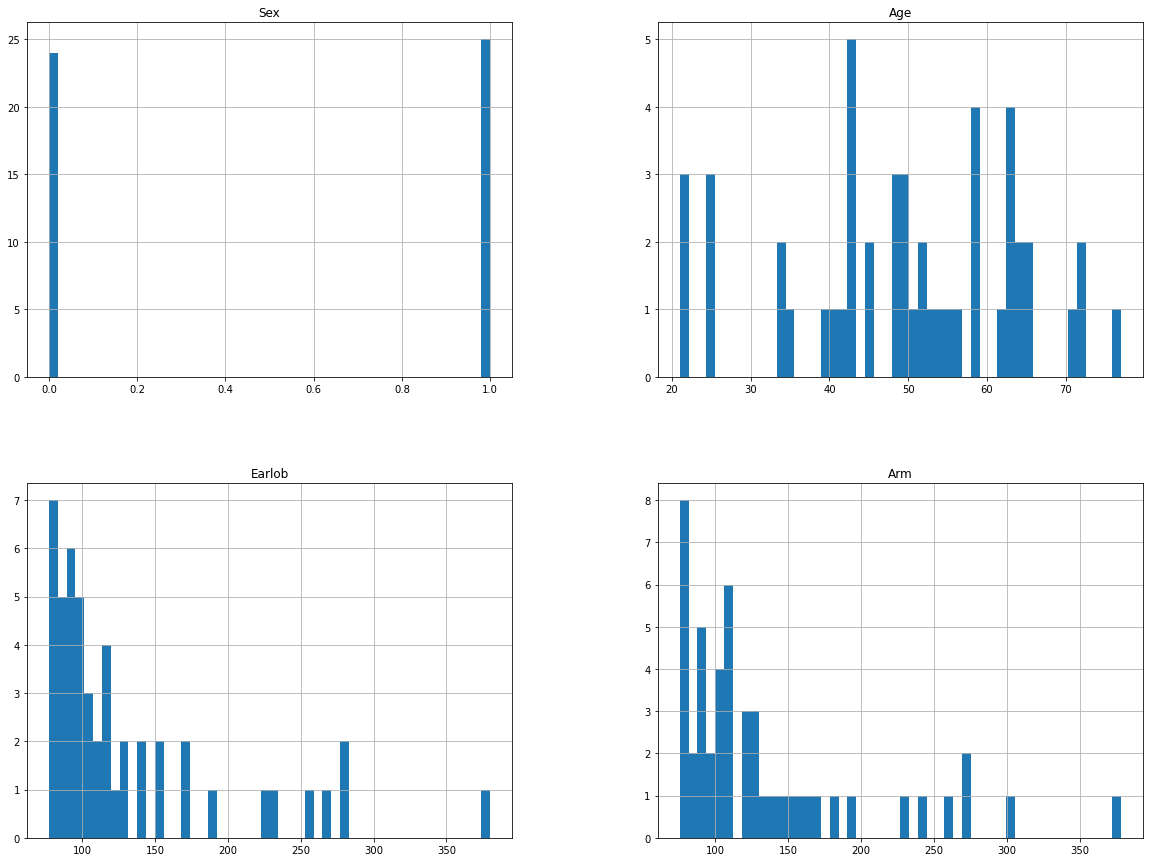

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
data.describe()

,Sex,Age,Earlob,Arm
count,49.000000,49.000000,49.000000,49.000000
mean,0.510204,49.673469,131.591837,135.330612
std,0.505076,14.270289,66.407805,67.789055
min,0.000000,21.000000,77.000000,75.600000
25%,0.000000,43.000000,92.000000,88.200000
50%,1.000000,50.000000,105.000000,109.800000
75%,1.000000,62.000000,140.000000,149.400000
max,1.000000,77.000000,380.000000,378.000000


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2)


In [43]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [44]:
y_pred=lr.predict(x_test)

In [45]:
print(y_pred)

[114.46176256 120.28050541  96.24024065 111.92507053  93.34183931]


In [46]:
print(y_test,'\n',y_pred)

[124.2 120.6 111.6 104.4  84.6] 
 [114.46176256 120.28050541  96.24024065 111.92507053  93.34183931]


In [47]:
z=y_test-y_pred
print(z)

[ 9.73823744  0.31949459 15.35975935 -7.52507053 -8.74183931]


array([[<AxesSubplot:xlabel='Arm', ylabel='Arm'>,
        <AxesSubplot:xlabel='Earlob', ylabel='Arm'>,
        <AxesSubplot:xlabel='Sex', ylabel='Arm'>,
        <AxesSubplot:xlabel='Age', ylabel='Arm'>],
       [<AxesSubplot:xlabel='Arm', ylabel='Earlob'>,
        <AxesSubplot:xlabel='Earlob', ylabel='Earlob'>,
        <AxesSubplot:xlabel='Sex', ylabel='Earlob'>,
        <AxesSubplot:xlabel='Age', ylabel='Earlob'>],
       [<AxesSubplot:xlabel='Arm', ylabel='Sex'>,
        <AxesSubplot:xlabel='Earlob', ylabel='Sex'>,
        <AxesSubplot:xlabel='Sex', ylabel='Sex'>,
        <AxesSubplot:xlabel='Age', ylabel='Sex'>],
       [<AxesSubplot:xlabel='Arm', ylabel='Age'>,
        <AxesSubplot:xlabel='Earlob', ylabel='Age'>,
        <AxesSubplot:xlabel='Sex', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>]], dtype=object)

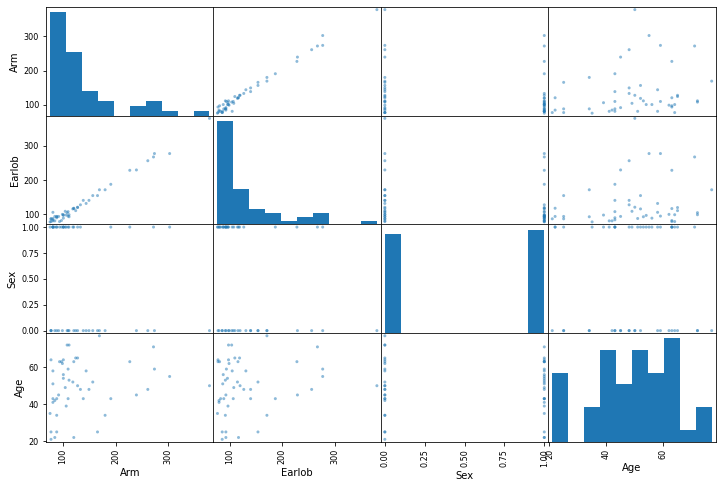

In [48]:
from pandas.plotting import scatter_matrix
attributes = ["Arm",  "Earlob",
"Sex","Age"]
scatter_matrix(data[attributes], figsize=(12, 8))

In [49]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

9.632278998283256

In [50]:
from sklearn import metrics
#print result of mae
print("mae",metrics.mean_absolute_error(y_test,y_pred))
print("mse",metrics.mean_squared_error(y_test,y_pred))
print("rmse",(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))

mae 8.336880243606444
mse 92.78079870076868
rmse 9.632278998283256


C:\Users\emana\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


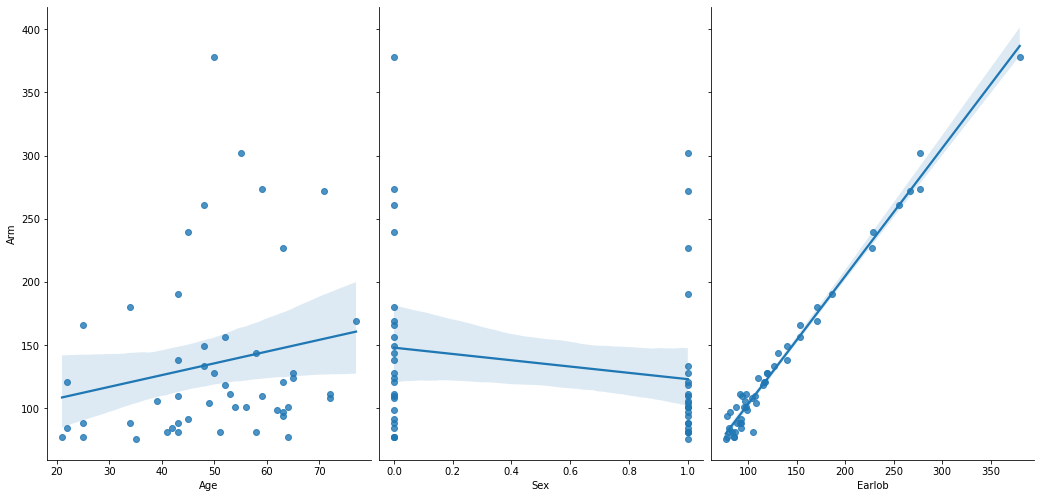

In [51]:
import seaborn as sns

sns.pairplot(data, x_vars=['Age','Sex','Earlob'], y_vars='Arm', size=7, aspect=0.7, kind='reg')
